`wu_generating_data_integer_taus_zero_phase_wrapped_many_small_spikes.ipynb`

> Generating data for the wrap-unwrap problem

> integer values of tau, zero phase or noise (i want to make this easy)

##### imports & notebook setup

In [2]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter

from plot_styles import set_plotstyles
set_plotstyles()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'

In [3]:
# frequency channels for all data

min_freq = 0.1   # GHz
max_freq = 0.2   # GHz
num_freqs = 1024
freqs = np.linspace(min_freq, max_freq, num_freqs) # GHz

In [4]:
# tau bounds
min_tau = -100 # ns
max_tau =  100 # ns

In [5]:
def get_slope(y, x = freqs):
    """
    Computes the mean slope of the data.
    Assumes the data is a *perfect* line
    
    Parameters
    ---------
    y (array) : complex data to be unwrapped
    x (array) : frequencies [GHz]
    
    Returns
    -------
    (float)  : slope of the line [nano-seconds]
    
    """
    return np.mean((np.diff(np.unwrap(y))  / (2 * np.pi)) / np.diff(x))

#### Generate data

> Data should have:
 - a low rate of spikes
 - a small amount of noise
  - occasional large amounts of noise
 - integer values of tau

In [6]:
# how many entries in the dataframe?
num_entries = 10000

# each entry has a slope computed before noise & spikes are applied
tau_col = np.empty(num_entries)

# generate data
data = np.empty((num_entries, num_freqs))
for i in range(num_entries):
    
    # fix tau
    tau = np.random.randint(min_tau,high = max_tau) 
    
    # fix phi
    phi = 0
    
    # generate angle data from complex data
    data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
    # compute slope
    tau_col[i] = get_slope(data[i])
    
    
    num_spikes = np.random.randint(0,20)
    for j in np.random.randint(0,high = len(freqs), size = num_spikes):
        data[i][j] += np.random.normal(loc = 0, scale = np.random.uniform(np.pi / 2))


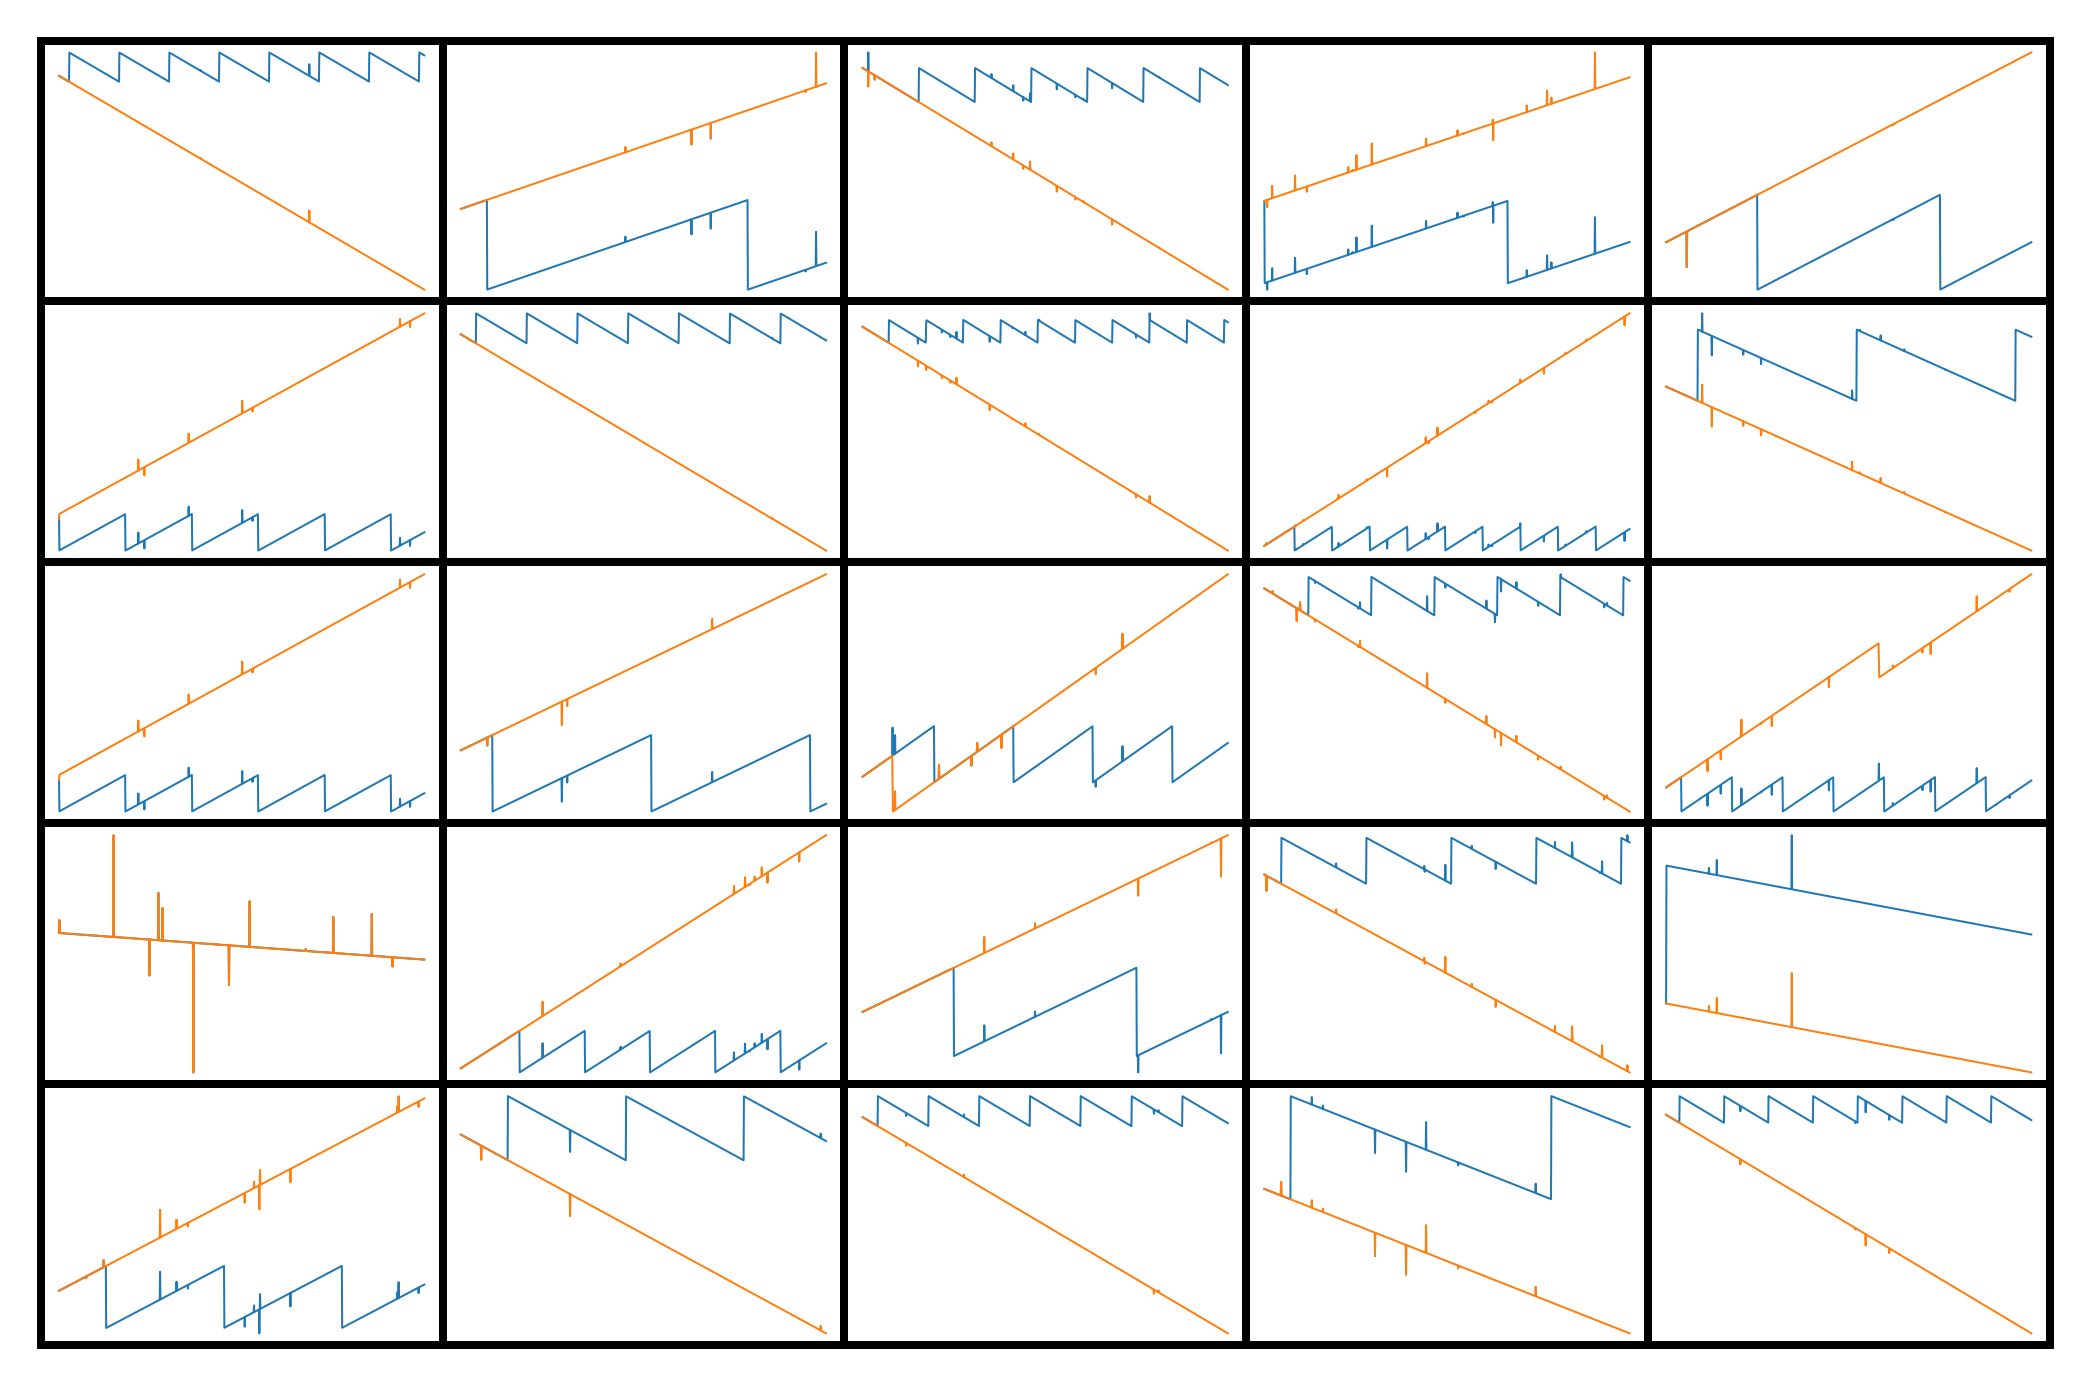

In [7]:
fig, axes = plt.subplots(5,5, figsize = (9, 6), dpi = 144)
nine_random_entries = np.random.choice(range(num_entries), size = 25)
for i, ax in enumerate(axes.reshape(-1)):
    
    ax.plot(freqs, data[nine_random_entries[i]],
            linewidth = 0.5)
    
    ax.plot(freqs, np.unwrap(data[nine_random_entries[i]]),
            linewidth = 0.5)

    
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.subplots_adjust(hspace = 0, wspace = 0)
plt.show()

In [8]:
df = pd.DataFrame(data)
df.insert(0, 'tau', tau_col)
df.to_csv('data/wu_10000_zero-noise_zero-spikes_integer-taus-wrapped_some-more-small-spikes.bz2', index = False, compression = 'bz2')